# Wine Quality Analysis

### -ALUGU DENNY THOMAS

### Importing Libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
data = pd.read_csv("Red_wine.csv")

In [7]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [6]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [5]:
data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

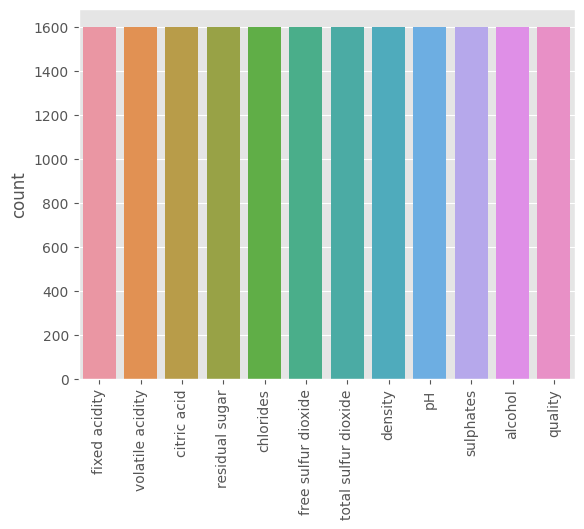

In [12]:
style.use('ggplot')
sns.countplot(data)
plt.xticks(rotation='vertical')

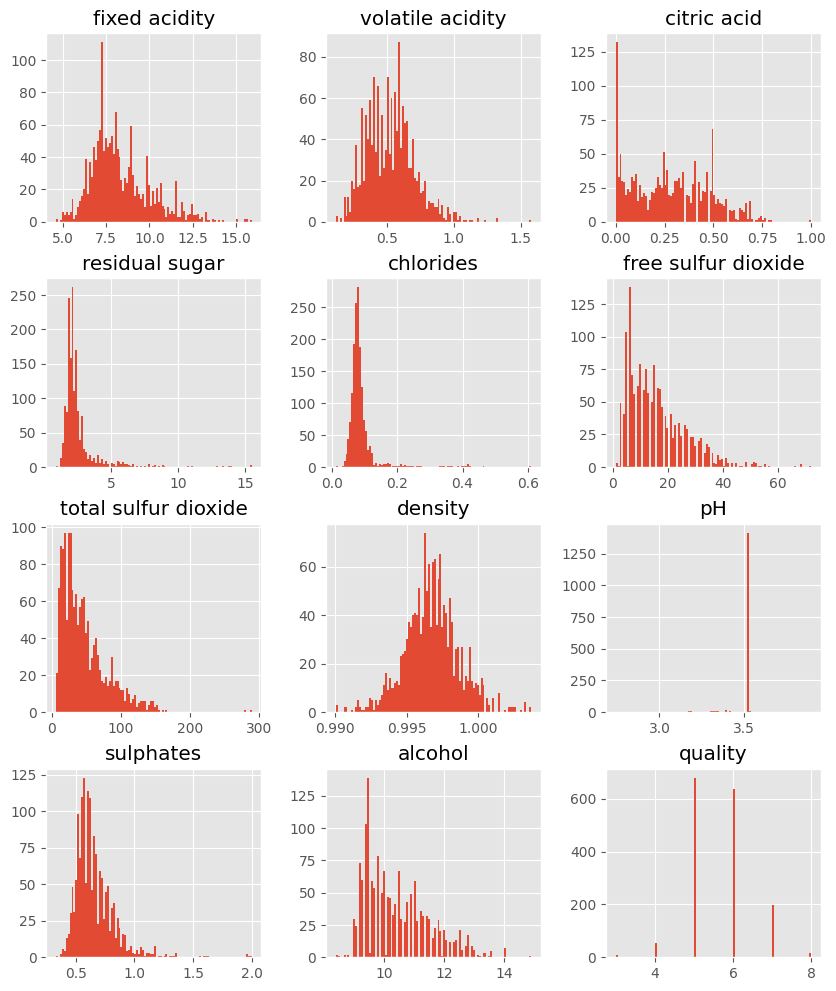

In [9]:
data.hist(bins=100, figsize=(10,12))
plt.show()

### Correlation Heatmap

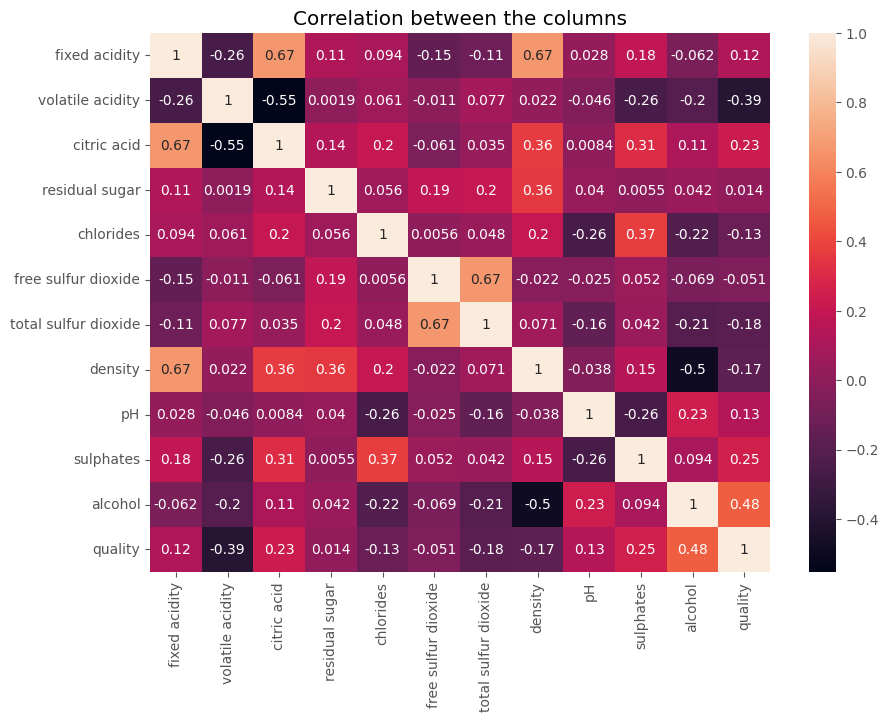

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [14]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390258
total sulfur dioxide   -0.184699
density                -0.174741
chlorides              -0.129011
free sulfur dioxide    -0.050899
residual sugar          0.013756
fixed acidity           0.123987
pH                      0.133961
citric acid             0.225867
sulphates               0.251118
alcohol                 0.475943
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

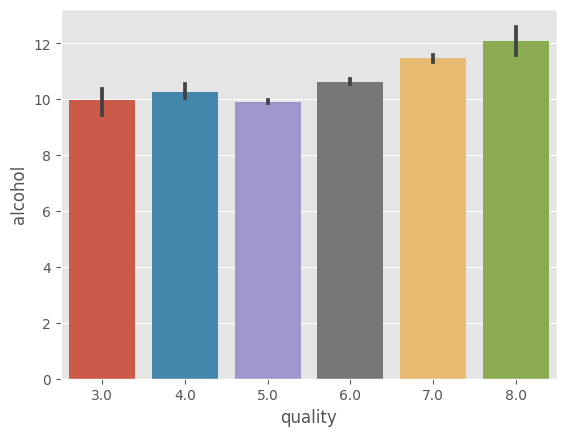

In [18]:
sns.barplot(x='quality', y='alcohol', data=data)

### Data Processing

In [19]:
data = data.dropna(subset=["quality"])

In [20]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1278, 11)
y_train  (1278,)
X_test  (320, 11)
y_test  (320,)


### Model Training

#### RandomForestClassifier

In [27]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Adjust the target variable accordingly


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [33]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 71.88%


In [35]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        11
         5.0       0.78      0.81      0.79       145
         6.0       0.66      0.75      0.70       123
         7.0       0.68      0.51      0.58        37
         8.0       1.00      0.25      0.40         4

    accuracy                           0.72       320
   macro avg       0.62      0.47      0.50       320
weighted avg       0.70      0.72      0.70       320



#### Decision Tree

In [37]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 60.00%


In [38]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00        11
         5.0       0.68      0.65      0.66       145
         6.0       0.60      0.64      0.62       123
         7.0       0.50      0.49      0.49        37
         8.0       0.25      0.25      0.25         4

    accuracy                           0.60       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.60      0.60      0.60       320



#### logistic Regression model

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 55.62%


In [41]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        11
         5.0       0.66      0.71      0.68       145
         6.0       0.47      0.60      0.52       123
         7.0       0.33      0.03      0.05        37
         8.0       0.00      0.00      0.00         4

    accuracy                           0.56       320
   macro avg       0.29      0.27      0.25       320
weighted avg       0.51      0.56      0.52       320



### Visualization of the actual vs. predicted values

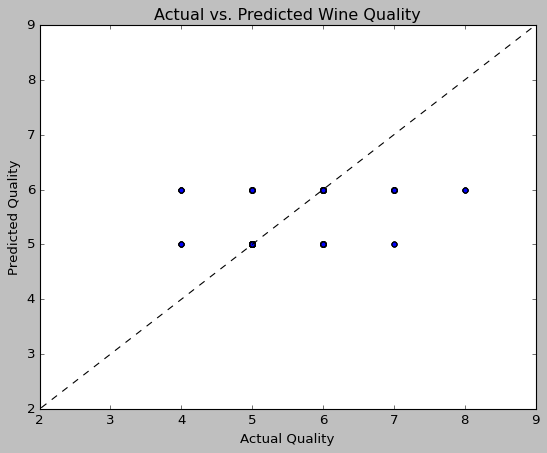

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], '--k')  # Diagonal line representing perfect predictions
plt.title("Actual vs. Predicted Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

### Visualization of the Residuals

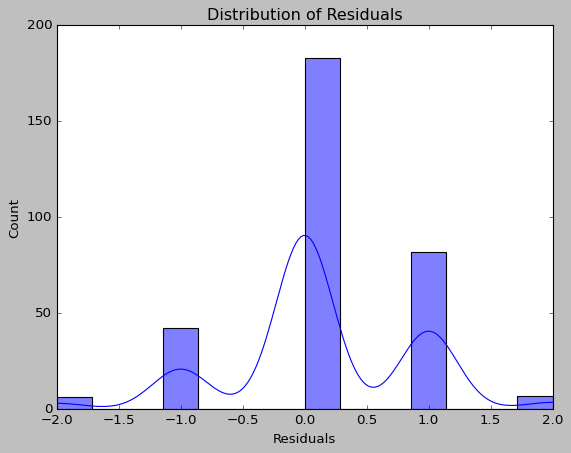

In [52]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

### Histogram of Wine Quality

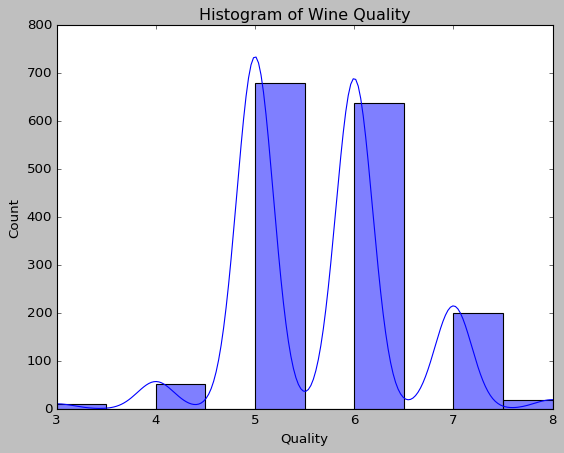

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="quality", kde=True, bins=10)
plt.title("Histogram of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()